# Import necessary libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load Dataset

In [31]:
# Get file path - loaded in Google Colab
file_path = '/content/spam.csv'

# Read the csv file using Pandas
email = pd.read_csv(file_path, encoding='ISO-8859-1') # Encoding of the csv file wasn't in UTF-8

In [32]:
# Update column names
column_mapping = {'v1': 'email', 'v2': 'msg'}
email = email.rename(columns=column_mapping)

In [33]:
# Get basic statistics
email.describe()

,email,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


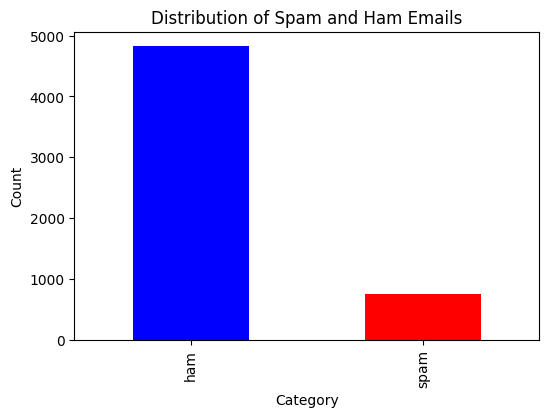

In [34]:
# Explore the dataset
plt.figure(figsize=(6, 4))
email['email'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [35]:
# A look at the dataset
email.head(10)

,email,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# Method 1

### Data Pre-processing

In [36]:
# Convert categorical labels to numerical format
le = LabelEncoder() # ham->0 spam->1
email['email'] = le.fit_transform(email['email'])

email.head(10)

,email,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,0,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,0,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [37]:
# List of unwanted columns
columns_to_remove = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Remove unwanted columns
email = email.drop(columns=columns_to_remove)

email.head(10)

,email,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [38]:
# Load stop words and create a stemmer
stop_words = set(stopwords.words('english'))
porter_stemmer = PorterStemmer()

# Function to preprocess text
def preprocess_text(text):
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stop words
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    # Apply stemming
    tokens = [porter_stemmer.stem(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply text preprocessing to the entire dataset
email['msg'] = email['msg'].apply(preprocess_text)

email.head(10)

,email,msg
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though
5,1,freemsg hey darl 3 week word back like fun sti...
6,0,even brother like speak treat like aid patent
7,0,per request mell oru minnaminungint nurungu ve...
8,1,winner valu network custom select receivea pri...
9,1,mobil 11 month u r entitl updat latest colour ...


In [39]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(email['msg'], email['email'], test_size=0.2, random_state=1)

### Vectorization

In [40]:
# Text Preprocessing (using CountVectorizer)
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Display a few examples of the transformed text data
print('Transformed Text Data (Example):')
print(x_train[:1].toarray())

Transformed Text Data (Example):
[[0 0 0 ... 0 0 0]]


### Model Selection

In [41]:
# Naive Bayes
naive_bayes = MultinomialNB()

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=1)

# Random Forest
random_forest = RandomForestClassifier(random_state=1)

# SVM
svm_model = SVC(random_state=1)

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(random_state=1)

### Model Training

In [42]:
# Naive Bayes
print(naive_bayes.fit(x_train, y_train))

# Decision Tree
print(decision_tree.fit(x_train, y_train))

# Random Forest
print(random_forest.fit(x_train, y_train))

# SVM
print(svm_model.fit(x_train, y_train))

# Gradient Boosting
print(gradient_boosting.fit(x_train, y_train))

MultinomialNB()
DecisionTreeClassifier(random_state=1)
RandomForestClassifier(random_state=1)
SVC(random_state=1)
GradientBoostingClassifier(random_state=1)


### Model Evaluation

In [43]:
# Predictions
naive_bayes_pred = naive_bayes.predict(x_test)
decision_tree_pred = decision_tree.predict(x_test)
random_forest_pred = random_forest.predict(x_test)
svm_pred = svm_model.predict(x_test)
gradient_boosting_pred = gradient_boosting.predict(x_test)

In [44]:
# Accuracy
print("Naive Bayes Accuracy:", accuracy_score(y_test, naive_bayes_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, decision_tree_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gradient_boosting_pred))

Naive Bayes Accuracy: 0.9847533632286996
Decision Tree Accuracy: 0.9668161434977578
Random Forest Accuracy: 0.9811659192825112
SVM Accuracy: 0.9838565022421525
Gradient Boosting Accuracy: 0.9721973094170404


In [45]:
# Classification Reports
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, naive_bayes_pred))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, decision_tree_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, random_forest_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gradient_boosting_pred))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.96      0.92      0.94       139

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       976
           1       0.86      0.87      0.87       139

    accuracy                           0.97      1115
   macro avg       0.92      0.93      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.98      0.87      0.92       139

    accuracy                           0.98      1115
   macro avg 

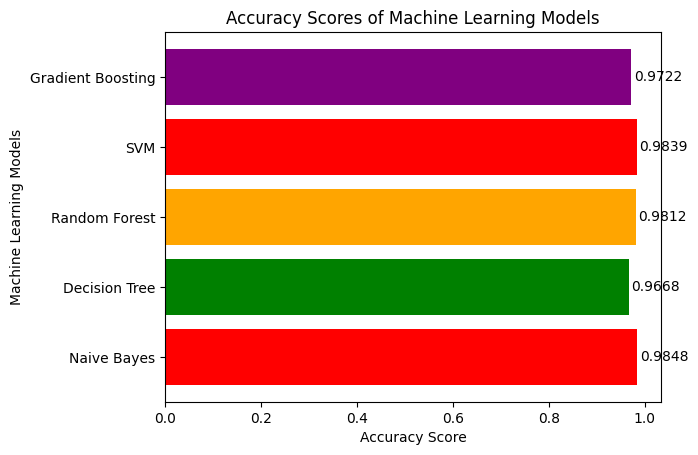

In [54]:
# Visualize the accuracy scores to better understand the performance of the model

# List of model names
models = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']

# Corresponding accuracy scores
accuracy_scores = [0.9847533632286996, 0.9668161434977578, 0.9811659192825112, 0.9838565022421525, 0.9721973094170404]

# Find the index of the max accuracy score
max_index = accuracy_scores.index(max(accuracy_scores))

# Create a horizontal bar plot
plt.barh(models, accuracy_scores, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add numerical values as text annotations
for i, v in enumerate(accuracy_scores):
    plt.text(v + 0.005, i, f'{v:.4f}', color='black', va='center')

# Highlight the bar with the max value
plt.barh(models[max_index], accuracy_scores[max_index], color='red')

# Add labels and title
plt.xlabel('Accuracy Score')
plt.ylabel('Machine Learning Models')
plt.title('Accuracy Scores of Machine Learning Models')

# Show the plot
plt.show()


##### Clearly, Naive Bayes is the best working model

# Method 2

### Getting Started

In [48]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(email['msg'], email['email'], test_size=0.2, random_state=1)

### Vectorization

In [49]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

### Model Training

In [50]:
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_tfidf, y_train)
print(nb_classifier)

# Decision Tree
dt_param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}
dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=1), dt_param_dist, n_iter=10, cv=3)
dt_random_search.fit(x_train_tfidf, y_train)
dt_classifier = dt_random_search.best_estimator_
print(dt_classifier)

# Random Forest
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=1), rf_param_dist, n_iter=10, cv=3)
rf_random_search.fit(x_train_tfidf, y_train)
rf_classifier = rf_random_search.best_estimator_
print(rf_classifier)

# SVM
svm_param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_random_search = RandomizedSearchCV(SVC(), svm_param_dist, n_iter=10, cv=3)
svm_random_search.fit(x_train_tfidf, y_train)
svm_classifier = svm_random_search.best_estimator_
print(svm_classifier)

# Gradient Boosting
gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=1), gb_param_dist, n_iter=10, cv=3)
gb_random_search.fit(x_train_tfidf, y_train)
gb_classifier = gb_random_search.best_estimator_
print(gb_classifier)

MultinomialNB()
DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_split=6,
                       random_state=1)
RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=1)
SVC(C=100, kernel='linear')
GradientBoostingClassifier(max_depth=6, min_samples_leaf=4,
                           min_samples_split=10, random_state=1)


### Model Evaluation

In [27]:
# Naive Bayes
nb_tfidf_predictions = nb_classifier.predict(x_test_tfidf)
nb_tfidf_accuracy = accuracy_score(y_test, nb_tfidf_predictions)
print('Naive Bayes (TF-IDF) Accuracy:', nb_tfidf_accuracy)
print('Naive Bayes (TF-IDF) Classification Report:')
print(classification_report(y_test, nb_tfidf_predictions))

# Decision Tree
dt_tfidf_predictions = dt_classifier.predict(x_test_tfidf)
dt_tfidf_accuracy = accuracy_score(y_test, dt_tfidf_predictions)
print('\nDecision Tree (TF-IDF) Accuracy:', dt_tfidf_accuracy)
print('Decision Tree (TF-IDF) Classification Report:')
print(classification_report(y_test, dt_tfidf_predictions))

# Random Forest
rf_tfidf_predictions = rf_classifier.predict(x_test_tfidf)
rf_tfidf_accuracy = accuracy_score(y_test, rf_tfidf_predictions)
print('\nRandom Forest (TF-IDF) Accuracy:', rf_tfidf_accuracy)
print('Random Forest (TF-IDF) Classification Report:')
print(classification_report(y_test, rf_tfidf_predictions))

# SVM
svm_tfidf_predictions = svm_classifier.predict(x_test_tfidf)
svm_tfidf_accuracy = accuracy_score(y_test, svm_tfidf_predictions)
print('\nSVM (TF-IDF) Accuracy:', svm_tfidf_accuracy)
print('SVM (TF-IDF) Classification Report:')
print(classification_report(y_test, svm_tfidf_predictions))

# Gradient Boosting
gb_tfidf_predictions = gb_classifier.predict(x_test_tfidf)
gb_tfidf_accuracy = accuracy_score(y_test, gb_tfidf_predictions)
print('\nGradient Boosting (TF-IDF) Accuracy:', gb_tfidf_accuracy)
print('Gradient Boosting (TF-IDF) Classification Report:')
print(classification_report(y_test, gb_tfidf_predictions))

Naive Bayes (TF-IDF) Accuracy: 0.9766816143497757
Naive Bayes (TF-IDF) Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       976
           1       0.99      0.82      0.90       139

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115


Decision Tree (TF-IDF) Accuracy: 0.9560538116591928
Decision Tree (TF-IDF) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       976
           1       0.82      0.83      0.82       139

    accuracy                           0.96      1115
   macro avg       0.90      0.90      0.90      1115
weighted avg       0.96      0.96      0.96      1115


Random Forest (TF-IDF) Accuracy: 0.9820627802690582
Random Forest (TF-IDF) Classification Report:
              precision    recall  f1-score   support


### Ensemble Technique

In [51]:
# Combining predictions from all models using a majority vote.
voting_classifier = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('svm', svm_classifier),
    ('gb', gb_classifier)
], voting='hard')

voting_classifier.fit(x_train_tfidf, y_train)
voting_predictions = voting_classifier.predict(x_test_tfidf)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print('\nVoting Classifier (TF-IDF) Accuracy:', voting_accuracy)
print('Voting Classifier (TF-IDF) Classification Report:')
print(classification_report(y_test, voting_predictions))


Voting Classifier (TF-IDF) Accuracy: 0.9847533632286996
Voting Classifier (TF-IDF) Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       1.00      0.88      0.93       139

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.99      0.98      0.98      1115



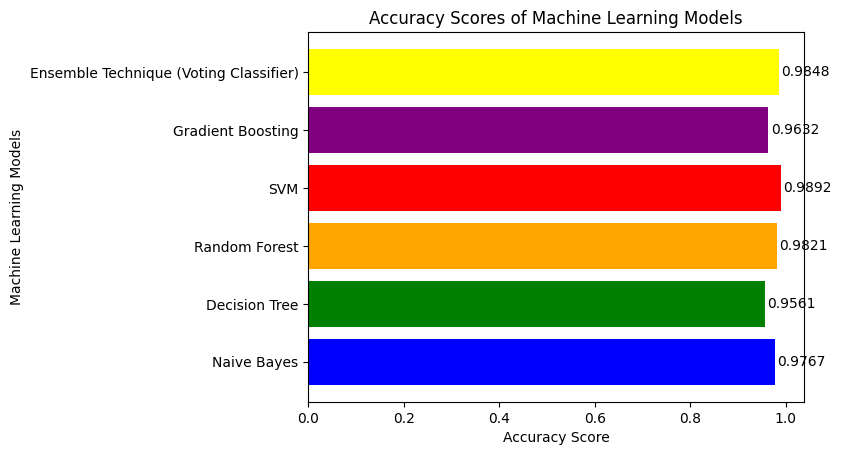

In [53]:
# Visualize the accuracy scores to better understand the performance of the model

# List of model names
models = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'Ensemble Technique (Voting Classifier)']

# Corresponding accuracy scores
accuracy_scores = [0.9766816143497757, 0.9560538116591928, 0.9820627802690582, 0.989237668161435, 0.9632286995515695, 0.9847533632286996]

# Find the index of the max accuracy score
max_index = accuracy_scores.index(max(accuracy_scores))

# Create a horizontal bar plot
plt.barh(models, accuracy_scores, color=['blue', 'green', 'orange', 'red', 'purple', 'yellow'])

# Add numerical values as text annotations
for i, v in enumerate(accuracy_scores):
    plt.text(v + 0.005, i, f'{v:.4f}', color='black', va='center')

# Highlight the bar with the max value
plt.barh(models[max_index], accuracy_scores[max_index], color='red')

# Add labels and title
plt.xlabel('Accuracy Score')
plt.ylabel('Machine Learning Models')
plt.title('Accuracy Scores of Machine Learning Models')

# Show the plot
plt.show()


##### Clearly, SVM is the best performer

# Predicting Spam/Ham in real time - using SVM (TF-IDF)

In [55]:
# Save the trained model to a file
joblib.dump(svm_classifier, 'svm_model_tfidf.pkl')

# Load the saved model from the file
loaded_model = joblib.load('svm_model_tfidf.pkl')

In [56]:
# Function to predict spam/ham in real-time
def predict_spam_or_ham(input_text, model):
    # Preprocess the input text
    preprocessed_text = preprocess_text(input_text)

    # Transform the preprocessed text using the CountVectorizer
    input_transformed = vectorizer.transform([preprocessed_text])

    # Make the prediction using the loaded model
    prediction = model.predict(input_transformed)

    return 'spam' if prediction[0] == 1 else 'ham'

In [58]:
# Take input from the user in real-time
user_input = input("Enter the email text: ")

# Use the predict_spam_or_ham function to make a prediction with the loaded model
result = predict_spam_or_ham(user_input, loaded_model)

# Display the result
print(f"The email is predicted as: {result}")

Enter the email text: congratulations. you have just won a cash prize of $10000
The email is predicted as: spam
